In [1]:
data_process = "data/processed"
data_final = "data/final/predictions.pkl"

In [2]:
import joblib 
import pandas as pd 
from sklearn.metrics import confusion_matrix
import joblib

#y_pred = joblib.load(data_process)['y_test']
#predictions = joblib.load(data_final)
#confusion_matrix(y_pred, predictions)

In [3]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import f1_score,roc_auc_score

In [4]:
df = pd.read_csv('C:/Users/HP 1O3O G2/complete_end_to-end_ml_project/data/raw/card_transdata.csv')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 43)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_transformed = scaler.fit_transform(X_train)
columns = X.columns
X_trained_transformed = pd.DataFrame(X_trained_transformed, columns = columns)
X_trained_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.211056,-0.094865,1.992367,0.366168,-0.735005,-0.334095,0.732968
1,-0.381153,0.930823,1.836468,0.366168,1.360535,-0.334095,0.732968
2,-0.262578,-0.205536,-0.545305,0.366168,-0.735005,-0.334095,0.732968
3,-0.204920,-0.151519,0.142076,0.366168,-0.735005,-0.334095,-1.364316
4,-0.234033,-0.227503,-0.546827,0.366168,-0.735005,-0.334095,0.732968


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logmodel = LogisticRegression(max_iter = 200)

In [11]:
logmodel.fit(X_trained_transformed,y_train)

LogisticRegression(max_iter=200)

In [12]:
X_test_transformed = scaler.transform(X_test)
columns = X.columns
X_test_transformed = pd.DataFrame(X_test_transformed, columns = columns)
X_test_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.559393,-0.222628,1.788491,0.366168,1.360535,-0.334095,0.732968
1,-0.322869,-0.216238,0.103321,0.366168,-0.735005,-0.334095,0.732968
2,-0.341000,-0.223533,0.309806,0.366168,1.360535,-0.334095,0.732968
3,-0.347664,-0.118146,0.771869,0.366168,-0.735005,-0.334095,0.732968
4,-0.388108,0.205750,-0.130159,-2.730988,1.360535,-0.334095,0.732968


In [13]:
predictions = logmodel.predict(X_test_transformed)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273810
         1.0       0.89      0.61      0.72     26190

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [16]:
confusion_matrix(y_test, predictions)

array([[271788,   2022],
       [ 10227,  15963]], dtype=int64)

In [17]:
accuracy_score(y_test, predictions)

0.95917

In [18]:
roc_auc_score(y_test, predictions)

0.8010613813903362

In [19]:
f1_score(y_test, predictions)

0.7227164685908319

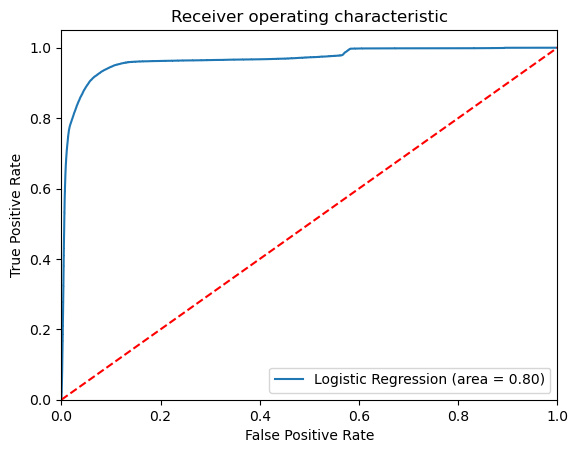

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_transformed))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_transformed)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
model_pipeline = Pipeline(steps=[('normalize_data', StandardScaler()), 
                                 ('log_regression', LogisticRegression(max_iter = 200))
                                 ])
# fit the pipeline with the training 

In [23]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('normalize_data', StandardScaler()),
                ('log_regression', LogisticRegression(max_iter=200))])

In [24]:
predictions2 = model_pipeline.predict(X_test)

In [25]:
predictions2

array([1., 0., 0., ..., 0., 0., 1.])

In [26]:
import pickle
# save model
#pickle.dump(model_pipeline, open("model_pipeline.pickle", "wb"))

In [27]:
# load model
#loaded_model = pickle.load(open("model_pipeline.pickle", "rb"))

In [28]:
#loaded_model.predict(X_test)

In [29]:
import mlflow
import mlflow.sklearn
import os
import warnings
import sys
import logging
from urllib.parse import urlparse
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

if __name__ == "__main__":
    
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url = (
         'C:/Users/HP 1O3O G2/complete_end_to-end_ml_project/data/raw/card_transdata.csv'
    )
    try:
        data = pd.read_csv(csv_url)
        
    except Exception as e:
        logger.exception(
            "Unable to download training & test CSV, check your internet connection. Error: %s", e
        )

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    X_train = train.drop(['fraud'], axis=1)
    X_test = test.drop(['fraud'], axis=1)
    y_train = train[['fraud']]
    y_test = test[['fraud']]
    
    max_iter=200
    
    #with mlflow.start_run():
    with mlflow.start_run(run_name="Fraud_detection_experiment") as run:
        model_pipeline = Pipeline(steps=[('normalize_data', StandardScaler()), 
                                 ('log_regression', LogisticRegression(max_iter = 200))
                                 ])
        # fit the pipeline with the training 
        model_pipeline.fit(X_train,y_train)
        predictions = model_pipeline.predict(X_test)

        #eval_matrix = print(classification_report(y_test, predictions))
        accuracy = accuracy_score(y_test, predictions)
        Area_Under_ROC = roc_auc_score(y_test, predictions)
        F1_Score = f1_score(y_test, predictions)
        

        print("Logistic Regression Model")
        print("  accuracy: %s" % accuracy)
        print("  Area_Under_ROC: %s" % Area_Under_ROC)
        print("  F1_Score: %s" % F1_Score)

        mlflow.log_param("Maximum Interation", max_iter)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Area_Under_ROC", Area_Under_ROC)
        mlflow.log_metric("F1_Score", F1_Score)
        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(model_pipeline, "model", registered_model_name="LogRegressionPipeline")
        else:
            mlflow.sklearn.log_model(model_pipeline, "model")

In [31]:
print("MLflow Version:", mlflow.version.VERSION)
mlflow.set_tracking_uri("http://localhost:5000")
print("Tracking URI:", mlflow.tracking.get_tracking_uri())

MLflow Version: 1.30.0
Tracking URI: http://localhost:5000


In [ ]:
! mlflow ui